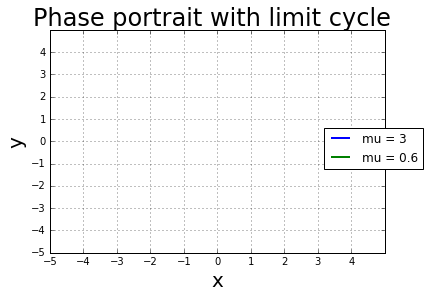

In [1]:
%matplotlib inline
import numpy as np 
from matplotlib import pyplot as plt 
from matplotlib import animation
from scipy.integrate import odeint
from IPython.display import HTML
from matplotlib import rc
import time
#Set up the plot details and labels for the animation
fig = plt.figure()
ax = plt.axes(xlim = (-5,5), ylim = (-5,5))
ax.set_xticks(np.arange(-5,5,1))
ax.set_yticks(np.arange(-5,5,1))
plt.grid()
plt.xlabel("x",fontsize = 20)
plt.ylabel("y",fontsize = 20)
handles = ["mu = 3","mu = 0.6"]
lines = [plt.plot([],[],lw = 2,label = handles[i])[0] for i in range(2)]
fig.legend(lines,handles,loc = "center right")
fig.suptitle("Phase portrait with limit cycle",fontsize = 24)

#Initialise the plot data
def init():
	for line in lines:
		line.set_data([],[])
	return lines

#The vanDerPol derivative function using scipy odeint
def VDP_Oscillator_derivative(x, t,mu):
	nx0 = x[1]
	nx1 = -mu * (x[0] ** 2.0 - 1.0) * x[1] - x[0]
	res = np.array([nx0, nx1,x[0]])
	return res

#Calling the derivative function for given initial values
ts = np.linspace(0.0, 50.0, 5000.0)
xs = [odeint(VDP_Oscillator_derivative, [-3.0, -3.0,1.0], ts, args = (3,)),odeint(VDP_Oscillator_derivative, [0.2, 0.0,0.0], ts, args = (0.6,))]

#The update function for the animation
def update(num,xs,lines):
    time.sleep(0.1)
    j = 0
    for line in lines:
        line.set_data(xs[j][:num,0], xs[j][:num,1])
        j = j + 1
    return lines

#Creating the static plot for state space variables
xs2 = odeint(VDP_Oscillator_derivative, [-3.0, -3.0,1.0], ts, args = (0.5,))
fig2 = plt.figure()
plt.grid()
ax2 = fig2.add_subplot(111)
ax2.set_ylim([-3.0,3.0])
plt.xlabel('Time Coordinate', fontsize=18)
plt.ylabel('Variable Value', fontsize=18)
plt.title('State Variables vs Time (mu = 0.5)', fontsize = 24)
ax2.plot(xs2[1000:,0],label = "x1")
ax2.plot(xs2[1000:,1],label = "x2")
plt.legend(loc="upper right")
plt.savefig("vanDerPol_state_space.png")
plt.close()
plt.grid()

xs3 = odeint(VDP_Oscillator_derivative, [-3.0, -3.0,1.0], ts, args = (0.01,))
fig3 = plt.figure()
plt.grid()
ax3 = fig3.add_subplot(111)
ax3.set_ylim([-5.0,5.0])
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Phase plot for mu = 0.01', fontsize = 24)
ax3.plot(xs3[:,0],xs3[:,1])
plt.savefig("vanDerPol_phase_1.png")
plt.close()
plt.grid()

xs4 = odeint(VDP_Oscillator_derivative, [-3.0, -3.0,1.0], ts, args = (2.0,))
fig4 = plt.figure()
plt.grid()
ax4 = fig4.add_subplot(111)
ax4.set_ylim([-5.0,5.0])
plt.xlabel('X', fontsize=18)
plt.ylabel('Y', fontsize=18)
plt.title('Phase plot for mu = 2', fontsize = 24)
ax4.plot(xs4[:,0],xs4[:,1])
plt.savefig("vanDerPol_phase_2.png")
plt.close()
anim = animation.FuncAnimation(fig, update, np.arange(1,len(xs[0])),init_func = init, fargs=[xs, lines],interval=2, blit=False)

#The below two lines can be used to generate the animation, which takes upto 20 minutes
#rc('animation', html='html5') 
#anim

#The pregenerated animation has been linked here from the local folder
HTML("""
<video width="429" height="298" controls autoplay>
  <source src="../output/130010006.mp4" type="video/mp4">
</video>
""")

